In [2]:
import numpy as np
import csv
import pandas
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as pyplot
import os, sys, warnings
import os.path as path
import plotly.plotly as py
import plotly.tools as tls

data = pandas.read_csv('/Users/kumarnarasimhan/Desktop/Independent Research/Code Work/10min.csv') #Importing the data set

In [3]:
data.shape

(98, 13)

In [4]:
data.head()

,#id,wm_ra (deg),ra_err (arcsec),wm_decl (deg),wm_uncertainty_ns (arcsec),datapoints,newsource.id,sigma min,sigma max,flux mean,flux max,v_int,eta_int
0,1654,152.240,1.326,2.749,1.324009,59,,,,0.062,0.110,0.372,0.899
1,1655,149.601,0.833,3.406,0.831325,145,731,186.561,25.469,0.624,0.814,0.084,3.234
2,1656,152.442,10.094,1.969,10.087586,1,774,745.049,25.601,0.041,0.471,3.621,6.002
3,1657,149.603,0.993,2.447,0.991628,104,,,,0.131,0.278,0.244,1.315
4,1658,149.442,5.088,0.959,5.087642,4,,,,0.057,0.120,0.333,0.915


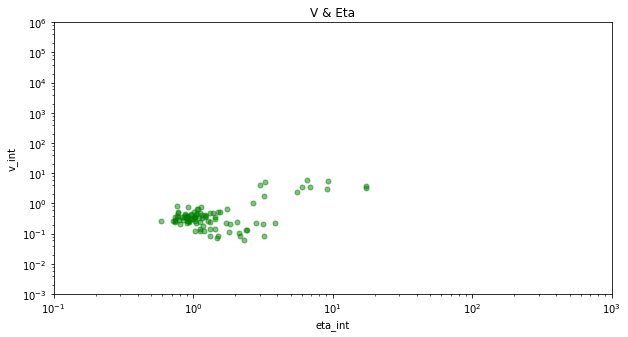

In [6]:
%matplotlib inline
pyplot.figure(figsize=(10,5))

procdir = '/Users/kumarnarasimhan/Desktop/Independent Research/Code Work/10min.csv'


#reading file, knowing where each part of the document is


with open(procdir, "r") as infile:
    read = csv.reader(infile)
    data = list(read)
#need to convert each list into an array
#make the list into a long column, not row --> (size,1)
size = len(data)
eta_int = np.ndarray(shape=(size,1),dtype=np.float64)
v_int = np.ndarray(shape=(size,1),dtype=np.float64)
flux_max = np.ndarray(shape=(size,1),dtype=np.float64)
flux_mean = np.ndarray(shape=(size,1))
#see where each variable is in the data. Creating an ith section//ek lekey, ek faeko
for i in range(1,size):
    eta_int[i-1,0] = float(data[i][12])
    v_int[i-1,0] = float(data[i][11])
    flux_max[i-1,0] = float(data[i][10])
    flux_mean[i-1,0] = float(data[i][9])


pyplot.plot(eta_int,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.xlim([10e-2, 10e2])
pyplot.ylim([10e-4,10e5])
pyplot.yscale('log')
pyplot.title('V & Eta')
pyplot.xlabel('eta_int')
pyplot.ylabel('v_int')

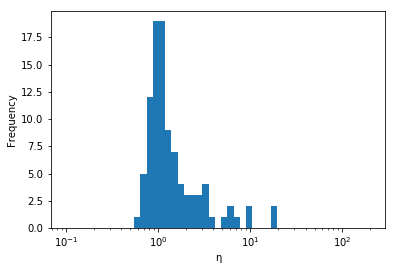

In [5]:
#plotting histograms of Eta

%matplotlib inline
# logspace sets the scale in a logarithmic scale, also needed to convert the bin scale to a log scale
pyplot.hist(eta_int,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True)
# pyplot.xlim([0.1,10])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('η')
pyplot.ylabel('Frequency')

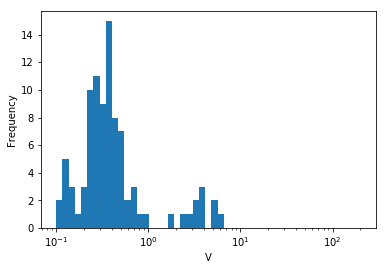

In [6]:
#plotting histograms of V

%matplotlib inline
pyplot.hist(v_int,bins=np.logspace(np.log10(0.1),np.log(10),50),log=True)
# pyplot.xlim([0.09,4])
pyplot.xscale('log')
pyplot.yscale('linear')
pyplot.xlabel('V')
pyplot.ylabel('Frequency')

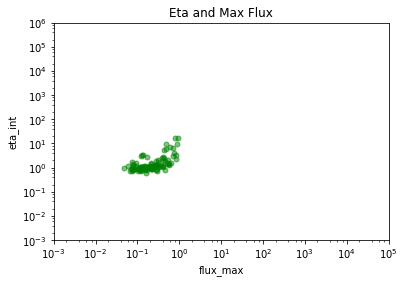

In [7]:
#plotting Eta and Max Flux

pyplot.plot(flux_max,eta_int, 'go', markersize=5, alpha = 0.5)

pyplot.xlim([10e-4, 10e4])
pyplot.ylim([10e-4,10e5])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('eta_int')

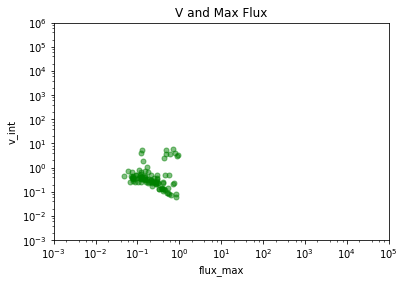

In [8]:
#plotting V and Max Flux
    
pyplot.plot(flux_max,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xlim([10e-4, 10e4])
pyplot.ylim([10e-4,10e5])
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max Flux')
pyplot.xlabel('flux_max')
pyplot.ylabel('v_int')

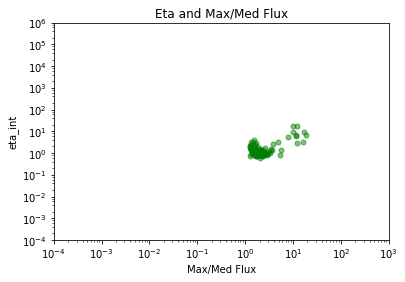

In [9]:
#plotting Eta and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:685]
pyplot.ylim([10e-5, 10e5])
pyplot.xlim([10e-5,10e2])
pyplot.plot(data_div,eta_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('Eta and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('eta_int')

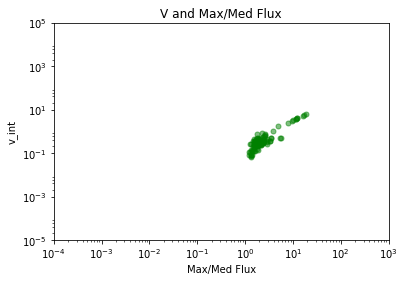

In [13]:
#plotting V and Max/Med Flux
with np.errstate(divide='ignore', invalid='ignore'):
    data_div=flux_max/flux_mean[:99]
# creating a new column of data with the right size which is where the 99 comes into play
pyplot.ylim([10e-6, 10e4])
pyplot.xlim([10e-5,10e2])
pyplot.plot(data_div,v_int, 'go', markersize=5, alpha = 0.5)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('V and Max/Med Flux')
pyplot.xlabel('Max/Med Flux')
pyplot.ylabel('v_int')